In [1]:
# Train RF on Validation Set and Evaluate on Train Set
import pandas as pd


In [ ]:
# Get training and validation data
validation_df = pd.read_csv('../../data_new/onco_tpm_431genes.csv')
validation_df.head()

,ENSG00000177000,ENSG00000136929,ENSG00000099250,ENSG00000111206,ENSG00000141367,ENSG00000003989,ENSG00000105664,ENSG00000145386,ENSG00000115232,ENSG00000091831,...,ENSG00000081041,ENSG00000115163,ENSG00000136160,ENSG00000186847,ENSG00000011426,ENSG00000102890,ENSG00000169919,ENSG00000141098,target,condition
0,4.384415,4.237347,4.481492,2.423341,3.671429,3.988709,0.000000,4.794097,4.664123,5.016764,...,3.931041,3.558458,2.396166,0.000000,4.880173,4.695355,3.846911,3.735964,1,Cancer
1,3.317647,6.017627,5.093115,4.300303,4.598318,3.654270,4.371391,4.118775,5.309421,5.552693,...,3.482896,4.991088,5.108584,3.846930,1.823754,0.000000,4.026902,2.651107,1,Cancer
2,4.509791,5.568804,4.060775,1.940462,4.390348,4.679523,3.853186,5.348951,5.246307,4.551217,...,3.360342,0.000000,3.220262,0.000000,5.060899,2.678051,2.164515,2.538319,1,Cancer
3,3.836253,2.422088,4.186665,4.479194,4.286662,4.074074,2.950672,3.607628,4.551858,4.536492,...,2.992352,3.526823,4.447237,4.577559,4.448336,0.000000,2.638939,3.409472,1,Cancer
4,1.143183,4.434782,4.264156,2.594545,4.643276,4.515016,4.851390,4.527395,5.878066,4.035533,...,4.126030,0.000000,4.188667,0.000000,5.591851,2.534646,2.032998,2.742670,1,Cancer


In [3]:
len(validation_df)

128

In [ ]:
training_df = pd.read_csv('../../data_new/validation_dataset.csv')
training_df.head()

,ENSG00000177000,ENSG00000136929,ENSG00000099250,ENSG00000111206,ENSG00000141367,ENSG00000003989,ENSG00000105664,ENSG00000145386,ENSG00000115232,ENSG00000091831,...,ENSG00000081041,ENSG00000115163,ENSG00000136160,ENSG00000186847,ENSG00000011426,ENSG00000102890,ENSG00000169919,ENSG00000141098,target,condition
0,3.782670,4.259302,4.417151,4.358471,3.902119,4.128486,3.233790,4.046987,3.827712,4.027099,...,4.595409,4.518049,4.196315,4.021448,4.592646,3.475701,4.640766,4.002556,1,Cancer
1,3.626085,3.990588,4.042219,3.959626,3.863754,4.251320,3.942492,2.065671,4.923032,3.599356,...,4.234996,3.856735,4.087684,2.295274,4.938197,2.157763,4.399134,3.495453,1,Cancer
2,3.518546,7.296438,3.898108,4.117388,4.163898,3.239877,3.799082,3.937257,4.019038,4.059895,...,0.000000,3.854934,2.661533,0.000000,4.230435,4.049555,0.000000,3.355847,1,Cancer
3,2.788626,4.011521,4.385953,1.792544,3.024992,3.345267,2.290736,4.190501,2.481263,3.923393,...,5.841412,2.825364,4.502686,2.653651,3.464698,3.913118,2.817271,4.451331,1,Cancer
4,3.986510,3.426000,4.476823,0.000000,2.567836,3.502399,3.091795,5.267998,3.067659,3.600492,...,4.049443,0.000000,2.499354,4.423705,2.770311,2.467648,3.665821,3.712258,1,Cancer


In [5]:
# Split features and class labels
x_train = training_df.iloc[:, :431]
y_train = training_df['target']

x_valid = validation_df.iloc[:, :431]
y_valid = validation_df['target']

x_train.head()

,ENSG00000177000,ENSG00000136929,ENSG00000099250,ENSG00000111206,ENSG00000141367,ENSG00000003989,ENSG00000105664,ENSG00000145386,ENSG00000115232,ENSG00000091831,...,ENSG00000088325,ENSG00000198901,ENSG00000081041,ENSG00000115163,ENSG00000136160,ENSG00000186847,ENSG00000011426,ENSG00000102890,ENSG00000169919,ENSG00000141098
0,3.782670,4.259302,4.417151,4.358471,3.902119,4.128486,3.233790,4.046987,3.827712,4.027099,...,3.706339,3.148059,4.595409,4.518049,4.196315,4.021448,4.592646,3.475701,4.640766,4.002556
1,3.626085,3.990588,4.042219,3.959626,3.863754,4.251320,3.942492,2.065671,4.923032,3.599356,...,4.939048,4.745122,4.234996,3.856735,4.087684,2.295274,4.938197,2.157763,4.399134,3.495453
2,3.518546,7.296438,3.898108,4.117388,4.163898,3.239877,3.799082,3.937257,4.019038,4.059895,...,4.751243,5.310154,0.000000,3.854934,2.661533,0.000000,4.230435,4.049555,0.000000,3.355847
3,2.788626,4.011521,4.385953,1.792544,3.024992,3.345267,2.290736,4.190501,2.481263,3.923393,...,3.465498,3.575944,5.841412,2.825364,4.502686,2.653651,3.464698,3.913118,2.817271,4.451331
4,3.986510,3.426000,4.476823,0.000000,2.567836,3.502399,3.091795,5.267998,3.067659,3.600492,...,4.351935,2.385114,4.049443,0.000000,2.499354,4.423705,2.770311,2.467648,3.665821,3.712258


In [6]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# Train SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')
svm_classifier.fit(x_train, y_train)

y_valid_pred = svm_classifier.predict(x_valid)
y_train_pred = svm_classifier.predict(x_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
metrics = classification_report(y_valid, y_valid_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {valid_accuracy}")
print(f"Classification Report on Validation Set:\n{metrics}")

Train Accuracy: 0.9875776397515528
Validation Accuracy: 0.75
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        32
           1       0.76      0.98      0.85        96

    accuracy                           0.75       128
   macro avg       0.63      0.52      0.48       128
weighted avg       0.69      0.75      0.67       128



In [8]:
# Perform k-fold cross-validation. Set k=5
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, x_train, y_train, cv=kfold, scoring='accuracy')

print(f"K-Fold Accuracies:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()} +/- {cv_scores.std()}")

K-Fold Accuracies: [0.75757576 0.65625    0.65625    0.75       0.59375   ]
Mean Cross-Validation Accuracy: 0.6827651515151516 +/- 0.06236498272098531


In [9]:
# Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    estimator=SVC(probability=True, random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.6640151515151516


In [10]:
# Test the Best Model on the Validation Set
best_svm = grid_search.best_estimator_
y_valid_best_pred = best_svm.predict(x_valid)

best_valid_accuracy = accuracy_score(y_valid, y_valid_best_pred)
best_metrics = classification_report(y_valid, y_valid_best_pred)

print(f"Validation Accuracy (Best SVM Model): {best_valid_accuracy}")
print(f"Classification Report (Best SVM Model):\n{best_metrics}")

Validation Accuracy (Best SVM Model): 0.7578125
Classification Report (Best SVM Model):
              precision    recall  f1-score   support

           0       0.53      0.25      0.34        32
           1       0.79      0.93      0.85        96

    accuracy                           0.76       128
   macro avg       0.66      0.59      0.60       128
weighted avg       0.72      0.76      0.72       128



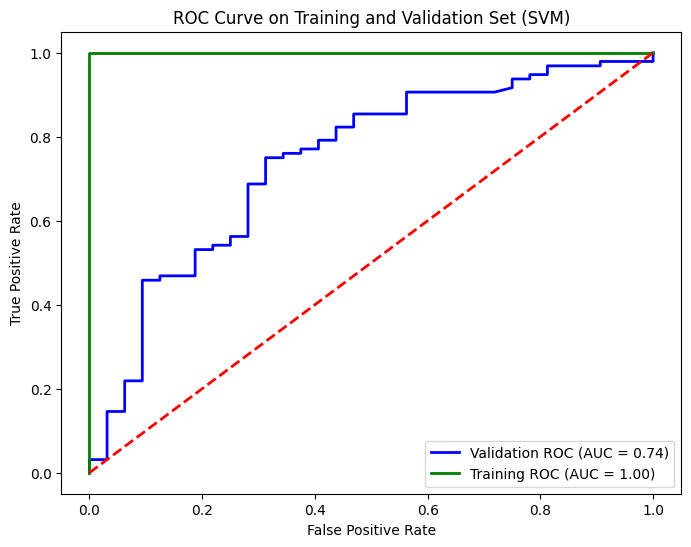

In [11]:
# Plot ROC Curves for Training and Validation Sets
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Validation set ROC
y_valid_proba = best_svm.predict_proba(x_valid)[:, 1]
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_proba)
roc_auc_valid = auc(fpr_valid, tpr_valid)

# Training set ROC
y_train_proba = best_svm.predict_proba(x_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_valid, tpr_valid, color='b', lw=2, label=f'Validation ROC (AUC = {roc_auc_valid:.2f})')
plt.plot(fpr_train, tpr_train, color='g', lw=2, label=f'Training ROC (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Training and Validation Set (SVM)')
plt.legend(loc="lower right")
plt.show()

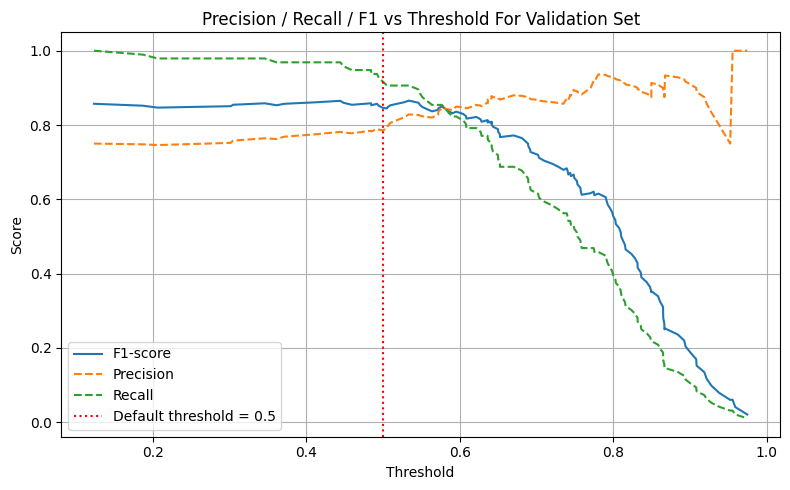

In [12]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_valid, y_valid_proba)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-10)

plt.figure(figsize=(8,5))
plt.plot(thresholds, f1_scores[:-1], label="F1-score")
plt.plot(thresholds, prec[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, rec[:-1], label="Recall", linestyle="--")
plt.axvline(0.5, color='red', linestyle=':', label="Default threshold = 0.5")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 vs Threshold For Validation Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()